# anomly-detection - a fast anomaly detection library for hierarchical timeseries

## Introduction

`anomaly-detection` builds on Facebook's Prophet algorithm to identify unusual outliers and trends within hierarchical time-series data. In only a few lines of code, you can:


The examples provided in this notebook were created using filtered data from the [M5 competition](https://www.kaggle.com/c/m5-forecasting-accuracy). It's intended as a reference for how this library is intended to be used, and will be updated frequently as we add more features.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:

import numpy as np
import pandas as pd
import os 

# help ipython find our path
directory = os.path.dirname(os.path.abspath(''))
os.chdir(directory)

from anomaly_detection import AnomalyDetector

In [3]:
data_path = os.path.join(directory, "examples", "small.csv")
#data = pd.read_csv(data_path)
data = pd.read_csv(
        "https://raw.githubusercontent.com/facebookincubator/prophet/master/examples/example_retail_sales.csv"
    )

### Sample Data

In [4]:
data

,ds,y
0,1992-01-01,146376
1,1992-02-01,147079
2,1992-03-01,159336
3,1992-04-01,163669
4,1992-05-01,170068
...,...,...
288,2016-01-01,400928
289,2016-02-01,413554
290,2016-03-01,460093
291,2016-04-01,450935


## Initialization

In [5]:
# detector = AnomalyDetector(data=data, target="sales", datetime_column="datetime", additional_regressors=["dept_id", "cat_id", "item_id", "state_id", "store_id"])

detector = AnomalyDetector(data=data, )

## Anomaly Detection

Behind the scenes, .detect_anomalies() fits Prophet's modeling pipeline to create trend curves and 95% confidence intervals that can be used to detect unusual behavior.

In [6]:
detector.detect_anomalies()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [7]:
detector.plot_anomalies()

alt.LayerChart(...)

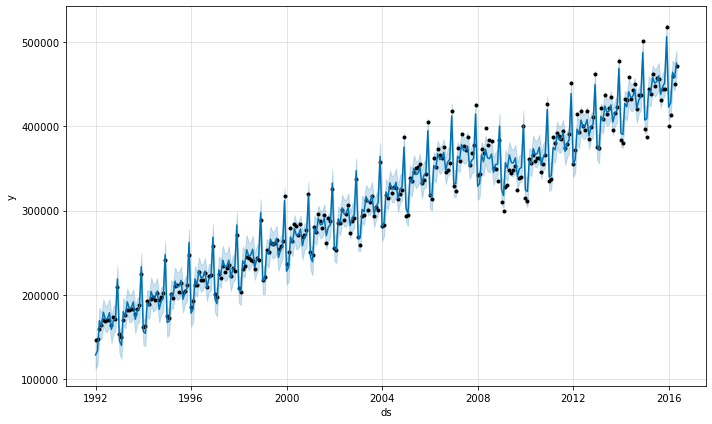

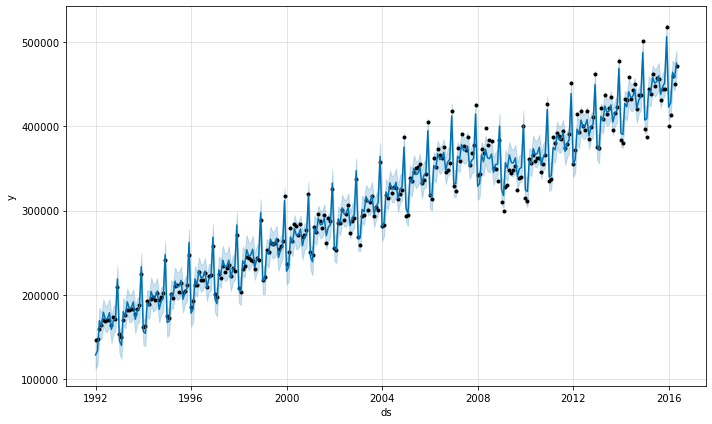

In [8]:
detector.plot_forecasts()

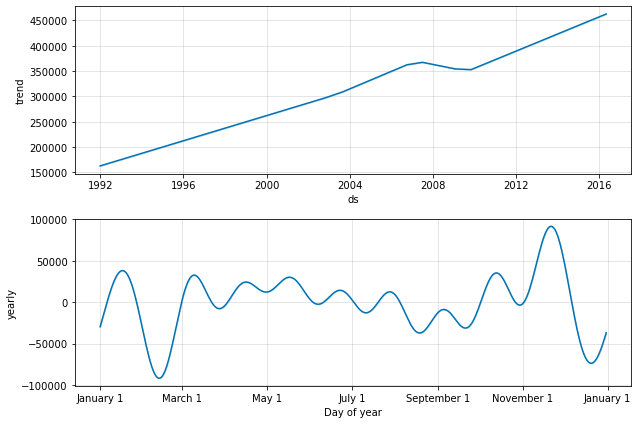

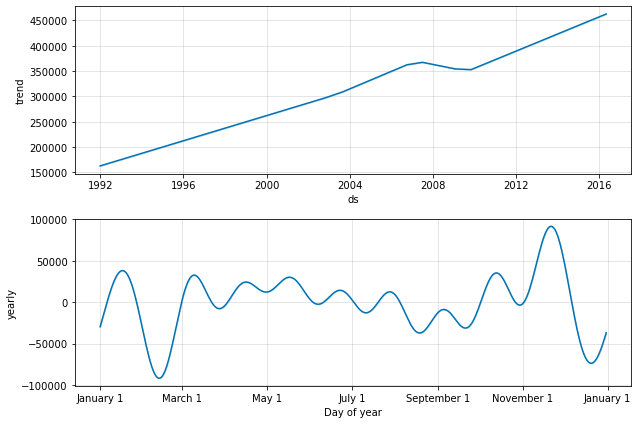

In [9]:
detector.plot_components()